In [19]:
import pandas as pd

# Load the dataset with low_memory set to False
df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Display the first few rows to check
df.head()
 

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
0,cscs_00001,1,Yes,Yes,British Columbia,71.0,Non-binary,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,cscs_00002,1,Yes,Yes,Ontario,69.0,Woman,NaN,NaN,Not Selected,...,3.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,No
2,cscs_00003,1,Yes,Yes,Quebec,56.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,cscs_00005,1,Yes,Yes,NaN,54.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,28.0,34.0,30.0,32.0,37.0,No
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,"Indigenous peoples (e.g., First Nations, Métis...","Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [20]:
# Remove rows with NaN in specified columns only
df_cleaned = df.dropna(subset=['WELLNESS_self_rated_physical_health', 
                               'WELLNESS_self_rated_mental_health', 
                               'WELLNESS_malach_pines_burnout_measure_depressed', 
                               'DEMO_identity_indigenous'])

# Verify if there are any NaN values left in the specified columns
print(df_cleaned.isnull().sum())

# Display the first few rows of the cleaned dataframe
print(df_cleaned.head())

UNIQUE_id                                          0
UNIQUE_num_records                                 0
ELIGIBLE_consent                                   0
GEO_residence_canada                               0
GEO_province                                       0
                                                ... 
PSYCH_big_five_inventory_conscientious_score    2869
PSYCH_big_five_inventory_extraverted_score      2869
PSYCH_big_five_inventory_neurotic_score         2869
PSYCH_big_five_inventory_open_score             2869
REMOVE_case                                        0
Length: 1794, dtype: int64
     UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
4   cscs_00006                   1              Yes                  Yes   
8   cscs_00010                   1              Yes                  Yes   
10  cscs_00012                   1              Yes                  Yes   
13  cscs_00015                   1              Yes                  Yes   
19  cscs_0

In [21]:
# Define the mapping for physical and mental health ratings
health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5,
}

# Define the mapping for burnout measurement levels
burnout_mapping = {
    'Never': 0,
    'Almost never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Very often': 5,
    'Always': 6,
}

# Use .loc to modify the columns directly
df_cleaned.loc[:, 'WELLNESS_self_rated_physical_health'] = df_cleaned['WELLNESS_self_rated_physical_health'].map(health_mapping)
df_cleaned.loc[:, 'WELLNESS_self_rated_mental_health'] = df_cleaned['WELLNESS_self_rated_mental_health'].map(health_mapping)
df_cleaned.loc[:, 'WELLNESS_malach_pines_burnout_measure_depressed'] = df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'].map(burnout_mapping)

# Display the first few rows to verify the changes
df_cleaned.head()

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,"Indigenous peoples (e.g., First Nations, Métis...","Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,cscs_00010,1,Yes,Yes,Nova Scotia,66.0,Man,Not Selected,Not Selected,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
10,cscs_00012,1,Yes,Yes,Ontario,27.0,Woman,Not Selected,Not Selected,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13,cscs_00015,1,Yes,Yes,British Columbia,48.0,Woman,Not Selected,Not Selected,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
19,cscs_00021,3,Yes,Yes,Alberta,73.0,Woman,Not Selected,Not Selected,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [22]:
# Define the mapping for Indigenous identity
identity_mapping = {
    'Indigenous peoples (e.g., First Nations, Métis, Inuit)': 1,
    'Not Selected': 0
}

# Apply the mapping to the 'DEMO_identity_indigenous' column using .loc
df_cleaned.loc[:, 'DEMO_identity_indigenous'] = df_cleaned['DEMO_identity_indigenous'].map(identity_mapping)

# Display the first few rows to verify the changes
df_cleaned.head()


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,1.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,cscs_00010,1,Yes,Yes,Nova Scotia,66.0,Man,Not Selected,0.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
10,cscs_00012,1,Yes,Yes,Ontario,27.0,Woman,Not Selected,0.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13,cscs_00015,1,Yes,Yes,British Columbia,48.0,Woman,Not Selected,0.0,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
19,cscs_00021,3,Yes,Yes,Alberta,73.0,Woman,Not Selected,0.0,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [23]:
import numpy as np

# Replace 'Presented but no response' with NaN using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'WELLNESS_self_rated_physical_health'] = df_cleaned['WELLNESS_self_rated_physical_health'].replace('Presented but no response', np.nan)
df_cleaned.loc[:, 'WELLNESS_self_rated_mental_health'] = df_cleaned['WELLNESS_self_rated_mental_health'].replace('Presented but no response', np.nan)
df_cleaned.loc[:, 'WELLNESS_malach_pines_burnout_measure_depressed'] = df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'].replace('Presented but no response', np.nan)
df_cleaned.loc[:, 'DEMO_identity_indigenous'] = df_cleaned['DEMO_identity_indigenous'].replace('Presented but no response', np.nan)

# Replace NaN values with the median for each column using .loc
df_cleaned.loc[:, 'WELLNESS_self_rated_physical_health'] = df_cleaned['WELLNESS_self_rated_physical_health'].fillna(df_cleaned['WELLNESS_self_rated_physical_health'].median())
df_cleaned.loc[:, 'WELLNESS_self_rated_mental_health'] = df_cleaned['WELLNESS_self_rated_mental_health'].fillna(df_cleaned['WELLNESS_self_rated_mental_health'].median())
df_cleaned.loc[:, 'WELLNESS_malach_pines_burnout_measure_depressed'] = df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'].fillna(df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'].median())
df_cleaned.loc[:, 'DEMO_identity_indigenous'] = df_cleaned['DEMO_identity_indigenous'].fillna(df_cleaned['DEMO_identity_indigenous'].median())

# Display the first few rows to verify the changes
df_cleaned.head()

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,1.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,cscs_00010,1,Yes,Yes,Nova Scotia,66.0,Man,Not Selected,0.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
10,cscs_00012,1,Yes,Yes,Ontario,27.0,Woman,Not Selected,0.0,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13,cscs_00015,1,Yes,Yes,British Columbia,48.0,Woman,Not Selected,0.0,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
19,cscs_00021,3,Yes,Yes,Alberta,73.0,Woman,Not Selected,0.0,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


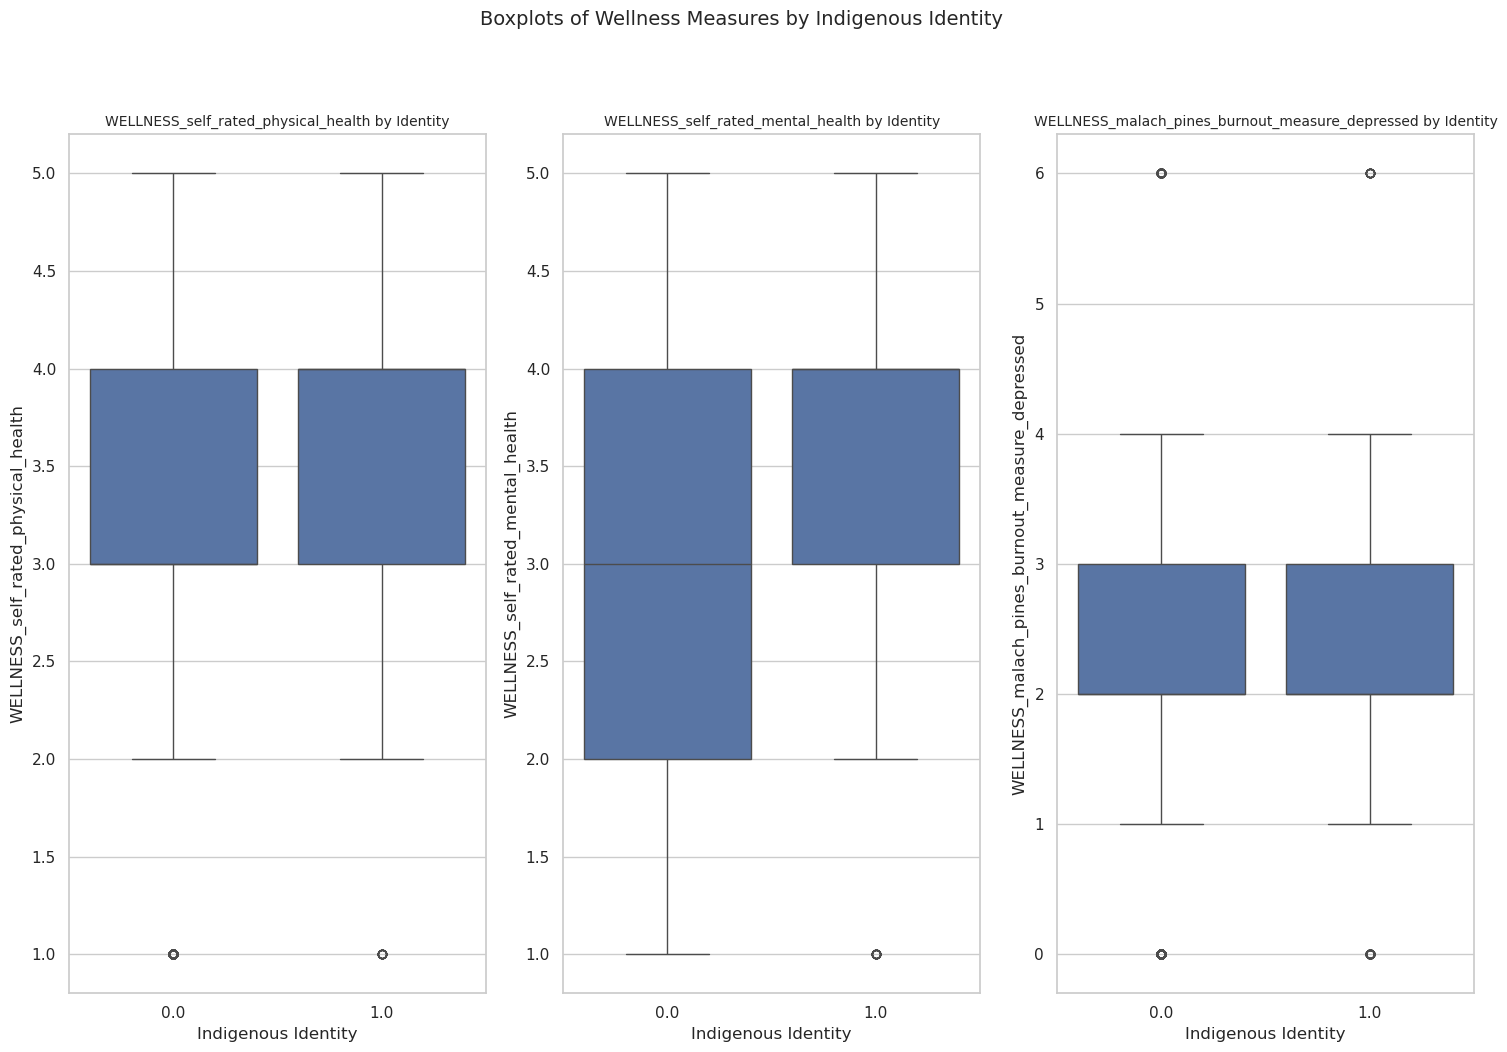

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Define the wellness variables
wellness_vars = [
    'WELLNESS_self_rated_physical_health',
    'WELLNESS_self_rated_mental_health',
    'WELLNESS_malach_pines_burnout_measure_depressed'
]

# Create subplots for each wellness variable
for i, var in enumerate(wellness_vars, start=1):
    plt.subplot(1, len(wellness_vars), i)
    sns.boxplot(
        x='DEMO_identity_indigenous',
        y=var,
        data=df_cleaned,
        hue=None  # Explicitly setting hue to None
    )
    plt.title(f'{var} by Identity', fontsize=10)  # Smaller font size for subplot titles
    plt.xlabel('Indigenous Identity')
    plt.ylabel(var)

# Add a main title for the entire figure
plt.suptitle('Boxplots of Wellness Measures by Indigenous Identity', fontsize=14, y=1.05)

# Adjust the layout and display the plots
plt.tight_layout(h_pad=2)  # Add padding between plots
plt.show()


In [25]:
# Loop through each burnout category
for category in burnout_categories:
    # Subset the data for the current burnout category
    subset = df_cleaned[df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'] == category]
    
    for outcome_var in ['WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health']:
        # Remove rows with NaN in the predictor or outcome
        subset = subset.dropna(subset=['DEMO_identity_indigenous', outcome_var])
        
        # Debugging: Check subset size
        print(f"Burnout Category: {category}, Outcome: {outcome_var}")
        print(f"Subset shape: {subset.shape}")
        if subset.empty:
            print(f"No data available for Burnout Category: {category} and Outcome: {outcome_var}. Skipping.\n")
            continue
        
        # Ensure numeric data
        try:
            subset['DEMO_identity_indigenous'] = pd.to_numeric(subset['DEMO_identity_indigenous'], errors='coerce')
            subset[outcome_var] = pd.to_numeric(subset[outcome_var], errors='coerce')
        except Exception as e:
            print(f"Error converting data to numeric for Burnout {category} - {outcome_var}: {e}")
            continue
        
        # Define X (predictor) and y (outcome)
        X = subset[['DEMO_identity_indigenous']]
        y = subset[outcome_var]
        
        # Add constant term (intercept) to the model
        X = sm.add_constant(X)
        
        # Debugging: Check for non-numeric or NaN values
        if X.isnull().values.any() or y.isnull().values.any():
            print("NaN values detected in X or y. Skipping this iteration.\n")
            continue
        
        # Fit the linear regression model
        try:
            model = sm.OLS(y, X).fit()
            # Save the summary for later review
            results[f'Burnout {category} - {outcome_var}'] = model.summary()
            # Print the regression results for this category and outcome
            print(f"Regression for Burnout {category} - {outcome_var}")
            print(model.summary())
            print("\n" + "="*80 + "\n")
        except Exception as e:
            print(f"Error fitting the model for Burnout {category} - {outcome_var}: {e}")
            continue


Burnout Category: 0, Outcome: WELLNESS_self_rated_physical_health
Subset shape: (297, 1794)
Regression for Burnout 0 - WELLNESS_self_rated_physical_health
                                     OLS Regression Results                                    
Dep. Variable:     WELLNESS_self_rated_physical_health   R-squared:                       0.037
Model:                                             OLS   Adj. R-squared:                  0.034
Method:                                  Least Squares   F-statistic:                     11.49
Date:                                 Mon, 25 Nov 2024   Prob (F-statistic):           0.000794
Time:                                         21:18:50   Log-Likelihood:                -410.62
No. Observations:                                  297   AIC:                             825.2
Df Residuals:                                      295   BIC:                             832.6
Df Model:                                            1                       

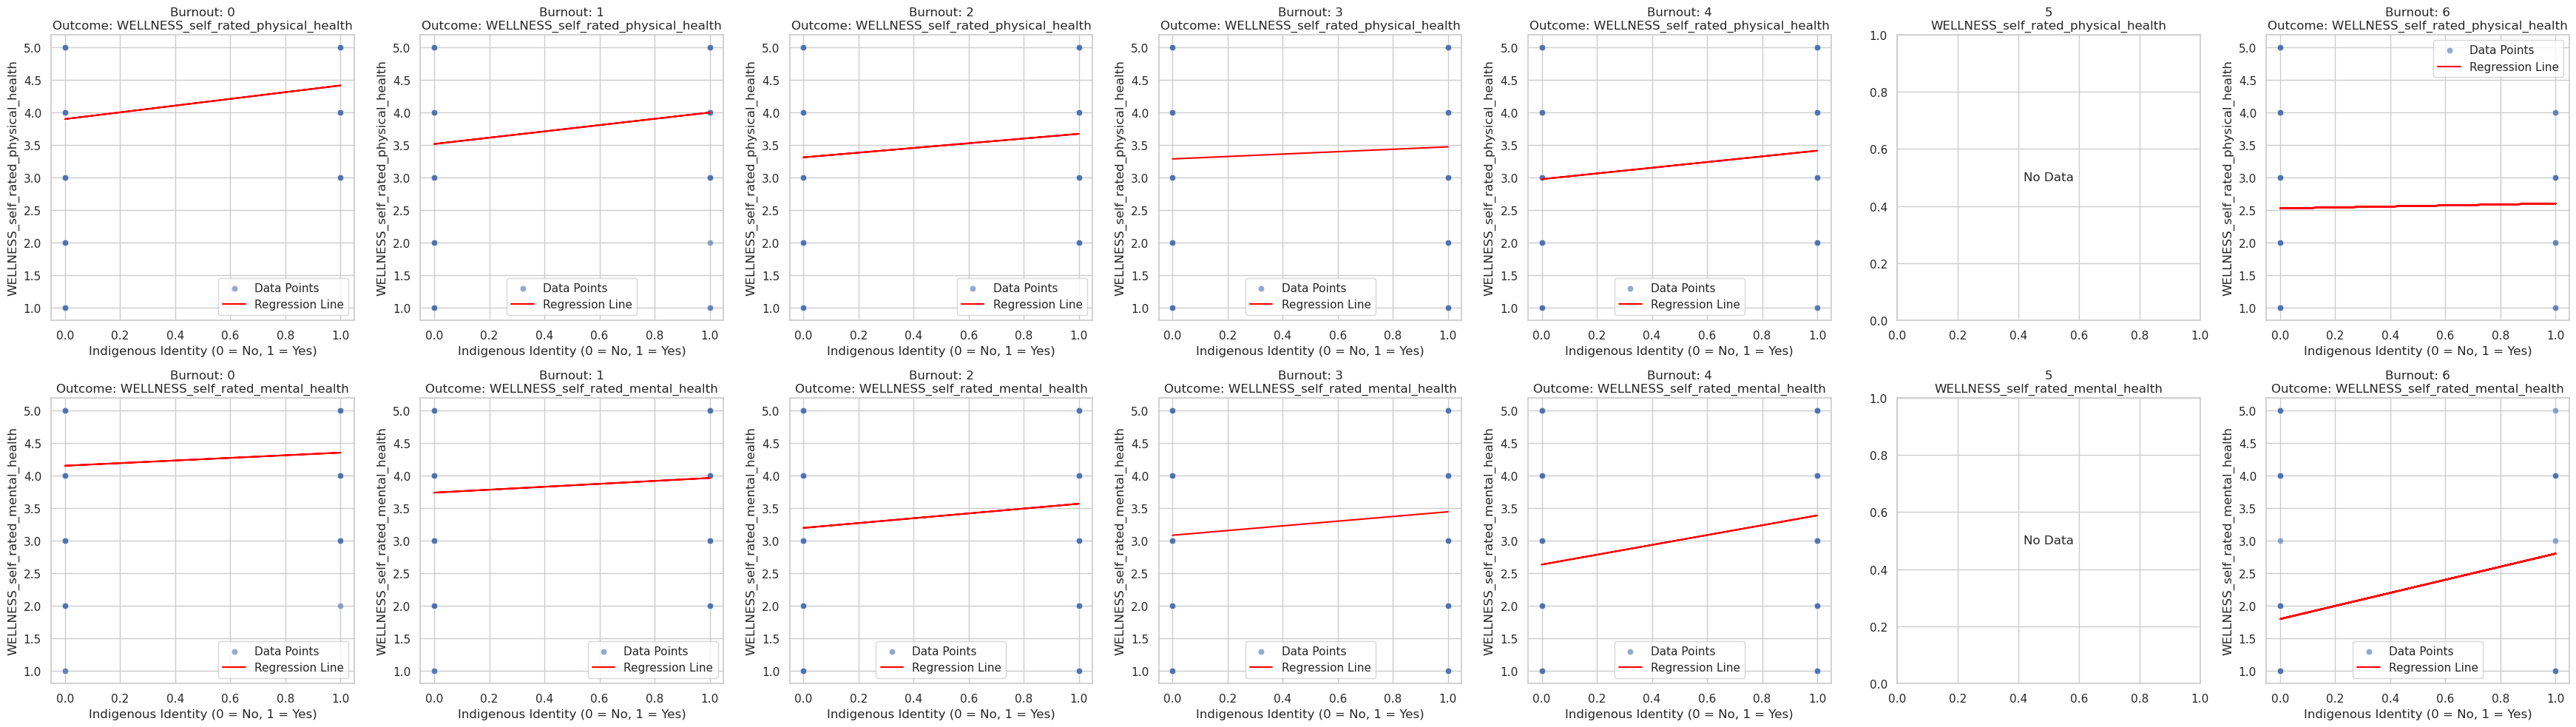

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Define the number of rows and columns for the subplot grid
n_categories = len(burnout_categories)
n_outcomes = 2  # Two outcome variables
fig, axes = plt.subplots(n_outcomes, n_categories, figsize=(5 * n_categories, 10), sharey=False)

# Loop through burnout categories and outcome variables
for col, category in enumerate(burnout_categories):
    # Subset the data for the current burnout category
    subset = df_cleaned[df_cleaned['WELLNESS_malach_pines_burnout_measure_depressed'] == category]
    
    for row, outcome_var in enumerate(['WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health']):
        # Remove rows with NaN in the predictor or outcome
        subset = subset.dropna(subset=['DEMO_identity_indigenous', outcome_var])
        
        if subset.empty:
            axes[row, col].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            axes[row, col].set_title(f"{category}\n{outcome_var}")
            continue
        
        # Ensure numeric data
        try:
            subset['DEMO_identity_indigenous'] = pd.to_numeric(subset['DEMO_identity_indigenous'], errors='coerce')
            subset[outcome_var] = pd.to_numeric(subset[outcome_var], errors='coerce')
        except Exception as e:
            axes[row, col].text(0.5, 0.5, 'Error in Data', ha='center', va='center', fontsize=12)
            axes[row, col].set_title(f"{category}\n{outcome_var}")
            continue
        
        # Define X (predictor) and y (outcome)
        X = subset[['DEMO_identity_indigenous']]
        y = subset[outcome_var]
        
        # Add constant term (intercept) to the model
        X = sm.add_constant(X)
        
        try:
            # Fit the linear regression model
            model = sm.OLS(y, X).fit()
            
            # Generate predictions for the regression line
            predictions = model.predict(X)
            
            # Plot data and regression line
            sns.scatterplot(
                x=subset['DEMO_identity_indigenous'], 
                y=subset[outcome_var],
                ax=axes[row, col],
                alpha=0.6,
                label="Data Points"
            )
            axes[row, col].plot(
                subset['DEMO_identity_indigenous'], 
                predictions, 
                color='red', 
                label="Regression Line"
            )
            
            # Add title and labels
            axes[row, col].set_title(f"Burnout: {category}\nOutcome: {outcome_var}")
            axes[row, col].set_xlabel("Indigenous Identity (0 = No, 1 = Yes)")
            axes[row, col].set_ylabel(outcome_var)
            axes[row, col].legend()
        except Exception as e:
            axes[row, col].text(0.5, 0.5, 'Error in Regression', ha='center', va='center', fontsize=12)
            axes[row, col].set_title(f"{category}\n{outcome_var}")
            continue

# Adjust layout
plt.tight_layout()
plt.show()


Research Question: How does an Indigenous and non Indigenous identity correlate with the number of somatic and affective symptoms experienced, and how does this relate to self reported depression.

H0: There is no relationship between Indigenous identity and the reporting of somatic and affective symptoms of depression.
H1: There is a significant relationship between Indigenous identity and the reporting of somatic and affective symptoms, with Indigenous individuals reporting higher proportions of somatic symptoms when suffering from depression.

Burnout 0, never: WELLNESS_self_rated_physical_health
Coeff: 0.5171
P value: 0.001
R squared: 0.037
    
Burnout 0, never: WELLNESS_self_rated_mental_health
Coeff: 0.2016
P value: 0.134
R squared: 0.008
    
Burnout 1, almost never: WELLNESS_self_rated_physical_health
Coeff: 0.4839
P value: 0.000
R squared:0.045
    
Burnout 1, almost never: WELLNESS_self_rated_mental_health
Coeff: 0.2251
P value: 0.033
R squared:0.012

Burnout 2, rarely: WELLNESS_self_rated_physical_health
Coeff: 0.3619
P value: 0.000
R squared: 0.023
    
Burnout 2, rarely: WELLNESS_self_rated_mental_health
Coeff: 0.3718
P value: 0.000
R squared: 0.020
    
Burnout 3, sometimes: WELLNESS_self_rated_physical_health
Coeff: 0.1858
P value: 0.025
R squared:0.006

Burnout 3, sometimes: WELLNESS_self_rated_mental_health
Coeff: 0.3608
P value: 0.000
R squared: 0.022
    
Burnout 4, often: WELLNESS_self_rated_physical_health
Coeff: 0.4378
P value: 0.001
R squared: 0.030
    
Burnout 4, often: WELLNESS_self_rated_mental_health
Coeff: 0.7557
P value: 0.000
R squared: 0.071

Burnout 5 very often,: NA

Burnout 6, always: WELLNESS_self_rated_physical_health
Coeff: 0.0762
P value: 0.858
R squared: 0.000
    
Burnout 6, always: WELLNESS_self_rated_mental_health
Coeff: 1.0063
P value: 0.041
R squared: 0.057

In [27]:
import pandas as pd

# Create a DataFrame with the data
data = {
    'Burnout Category': [
        'Burnout 0, never', 'Burnout 0, never',
        'Burnout 1, almost never', 'Burnout 1, almost never',
        'Burnout 2, rarely', 'Burnout 2, rarely',
        'Burnout 3, sometimes', 'Burnout 3, sometimes',
        'Burnout 4, often', 'Burnout 4, often',
        'Burnout 5, very often', 'Burnout 6, always', 
        'Burnout 6, always'
    ],
    'Outcome Variable': [
        'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health',
        'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health',
        'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health',
        'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health',
        'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health',
        'NA', 'WELLNESS_self_rated_physical_health', 'WELLNESS_self_rated_mental_health'
    ],
    'Coefficient': [
        0.5171, 0.2016, 0.4839, 0.2251, 0.3619, 0.3718, 
        0.1858, 0.3608, 0.4378, 0.7557, None, 0.0762, 1.0063
    ],
    'P-Value': [
        0.001, 0.134, 0.000, 0.033, 0.000, 0.000, 
        0.025, 0.000, 0.001, 0.000, None, 0.858, 0.041
    ],
    'R-Squared': [
        0.037, 0.008, 0.045, 0.012, 0.023, 0.020, 
        0.006, 0.022, 0.030, 0.071, None, 0.000, 0.057
    ]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


           Burnout Category                     Outcome Variable  Coefficient  \
0          Burnout 0, never  WELLNESS_self_rated_physical_health       0.5171   
1          Burnout 0, never    WELLNESS_self_rated_mental_health       0.2016   
2   Burnout 1, almost never  WELLNESS_self_rated_physical_health       0.4839   
3   Burnout 1, almost never    WELLNESS_self_rated_mental_health       0.2251   
4         Burnout 2, rarely  WELLNESS_self_rated_physical_health       0.3619   
5         Burnout 2, rarely    WELLNESS_self_rated_mental_health       0.3718   
6      Burnout 3, sometimes  WELLNESS_self_rated_physical_health       0.1858   
7      Burnout 3, sometimes    WELLNESS_self_rated_mental_health       0.3608   
8          Burnout 4, often  WELLNESS_self_rated_physical_health       0.4378   
9          Burnout 4, often    WELLNESS_self_rated_mental_health       0.7557   
10    Burnout 5, very often                                   NA          NaN   
11        Burnout 6, always 